# Results

We run different experiments for different number of processes. We want to analyze the effect of the processes in the convergence of the algorithm and the RMSE. Moreover it is also interesting to analyze the time.

### Virus Dataset (dataset 1)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
!python sequential_version.py V

name= "V"
RMSE_train_sequential1 = np.load(name+"_RMSE_train.npy")
RMSE_test_sequential1 = np.load(name+"_RMSE_test.npy")
time_per_epoch_sequential1 = np.load(name+"_time.npy")
acum_time_sequential1 = np.cumsum(time_per_epoch_sequential1)
total_time_sequential1 = np.sum(time_per_epoch_sequential1)
mean_time_sequential1 = np.mean(time_per_epoch_sequential1)

Loading virus dataset...


Running for  2  processes
Loading virus dataset...
Reading and preprocessing time in master: 16.63631508119579
Running for  3  processes
Loading virus dataset...
Reading and preprocessing time in master: 18.087430093379226
Running for  4  processes
Loading virus dataset...
Reading and preprocessing time in master: 23.88613023601647
Running for  8  processes
Loading virus dataset...
Reading and preprocessing time in master: 21.70780289445247


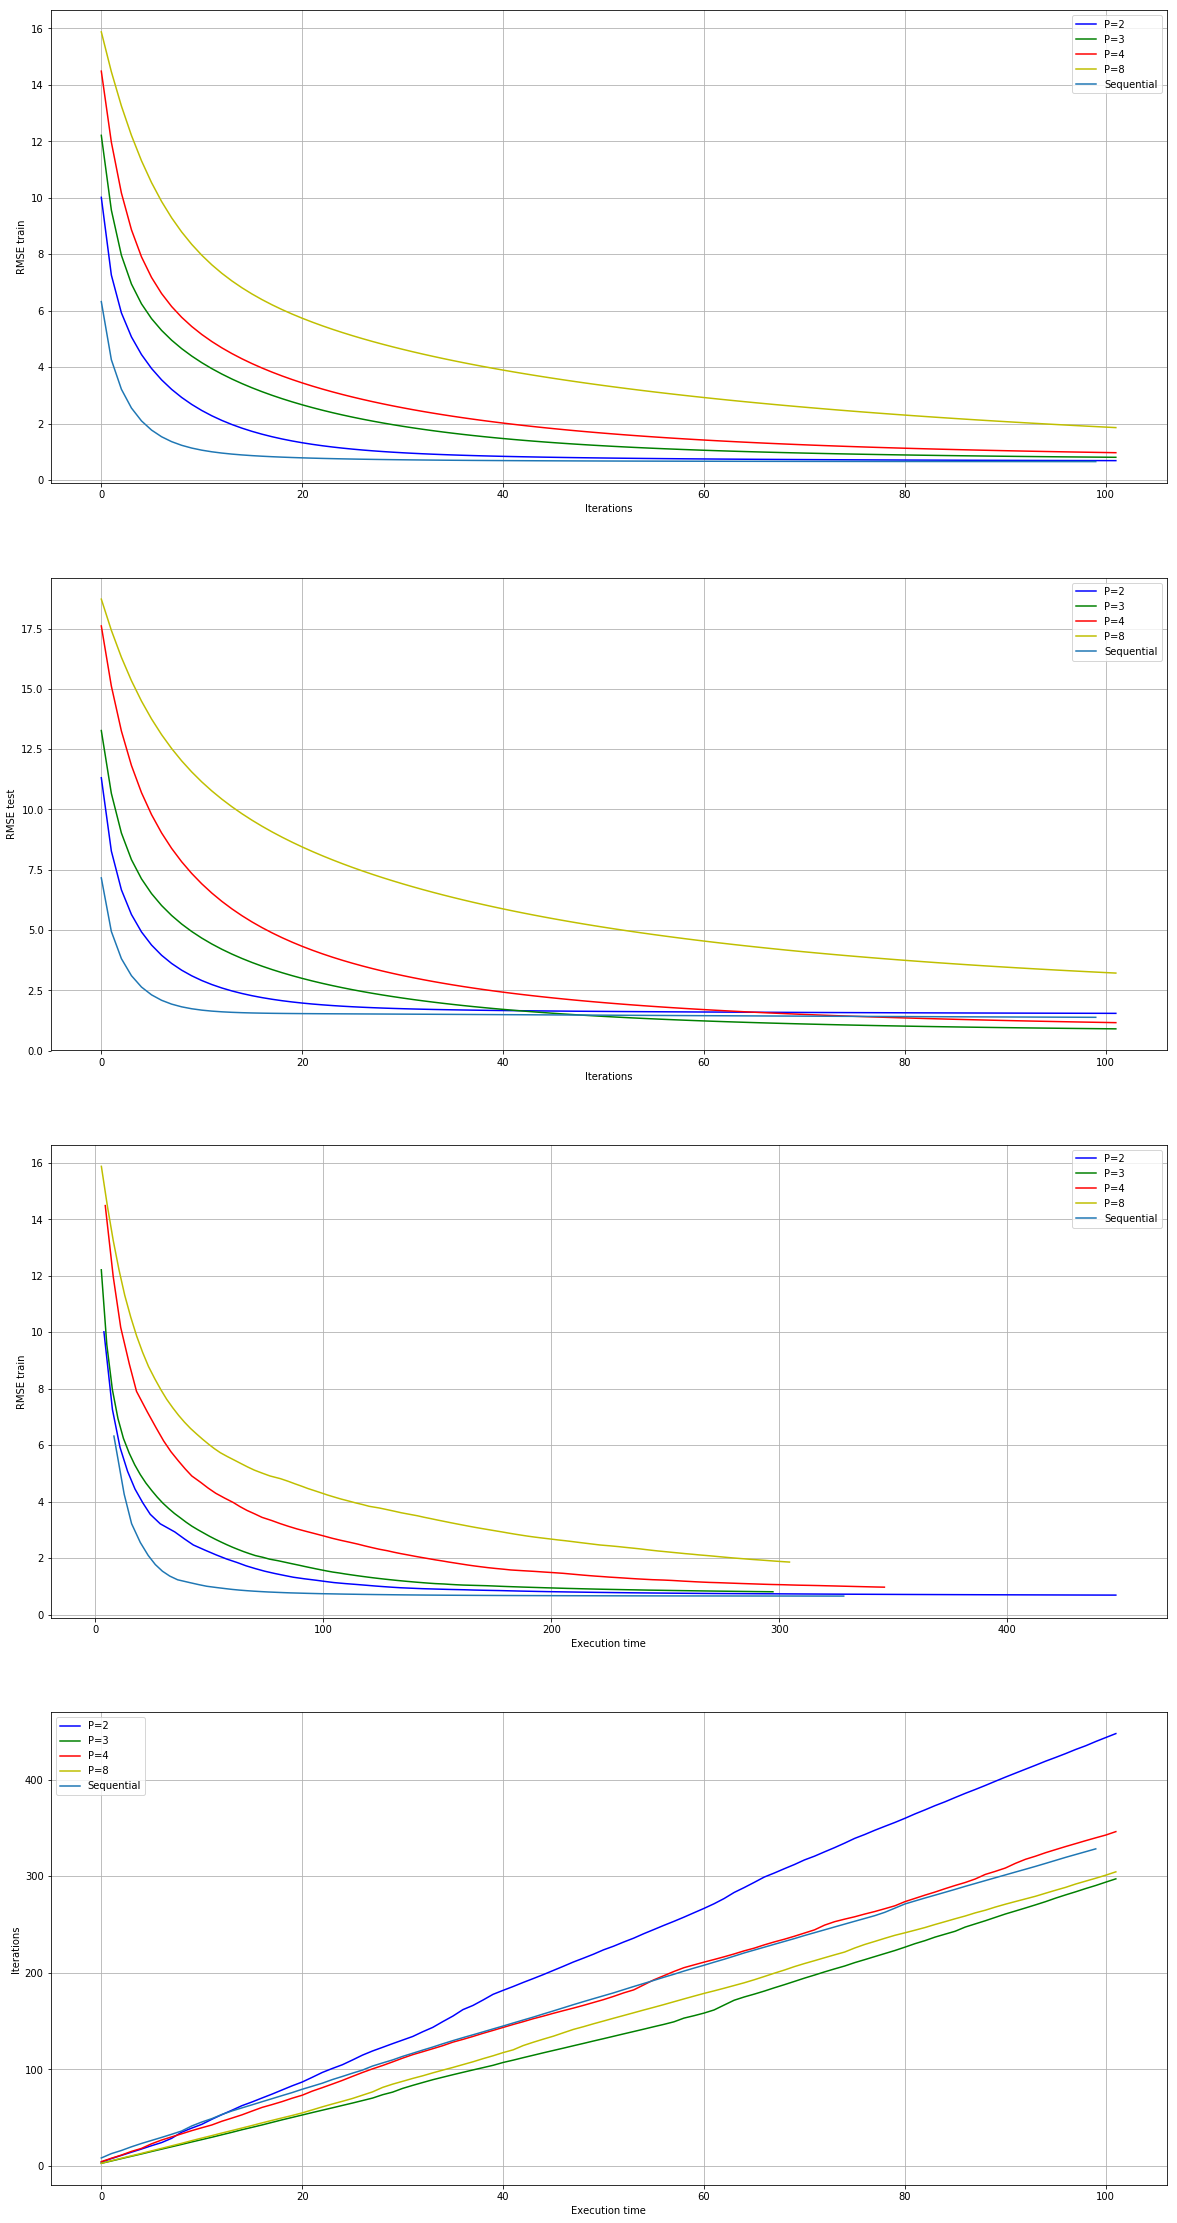

In [15]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20,40)) # two axes on figure
col = ["b", "g", "r", "y"]
processes = [2,3,4,8]

RMSE_train_list1 = []
RMSE_test_list1 = []
acum_time_list1 = []
total_time_list1 = []
mean_time_list1 = []


for i in range(len(processes)):
    
    p = processes[i]
    print("Running for ", p, " processes")

    name = "V"+str(p)
    !mpiexec -n $p python PSGD_MPI.py $name
    
    RMSE_train = np.load(name+"_RMSE_train.npy")
    RMSE_test = np.load(name+"_RMSE_test.npy")
    time_per_epoch = np.load(name+"_time.npy")
    acum_time = np.cumsum(time_per_epoch)
    total_time = np.sum(time_per_epoch)
    mean_time = np.mean(time_per_epoch)
    
    RMSE_train_list1.append(RMSE_train)
    RMSE_test_list1.append(RMSE_test)
    acum_time_list1.append(acum_time)
    total_time_list1.append(total_time)
    mean_time_list1.append(mean_time)
    
    ax1.plot(RMSE_train, col[i]+"-")
    ax2.plot(RMSE_test, col[i]+"-")
    ax3.plot(acum_time, RMSE_train, col[i]+"-")
    ax4.plot(acum_time, col[i]+"-")

ax1.plot(RMSE_train_sequential1)
ax2.plot(RMSE_test_sequential1)
ax3.plot(acum_time_sequential1, RMSE_train_sequential1)
ax4.plot(acum_time_sequential1)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("RMSE train")
ax1.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax1.grid()

ax2.set_xlabel("Iterations")
ax2.set_ylabel("RMSE test")
ax2.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax2.grid()

ax3.set_xlabel("Execution time")
ax3.set_ylabel("RMSE train")
ax3.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax3.grid()

ax4.set_xlabel("Execution time")
ax4.set_ylabel("Iterations")
ax4.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax4.grid()

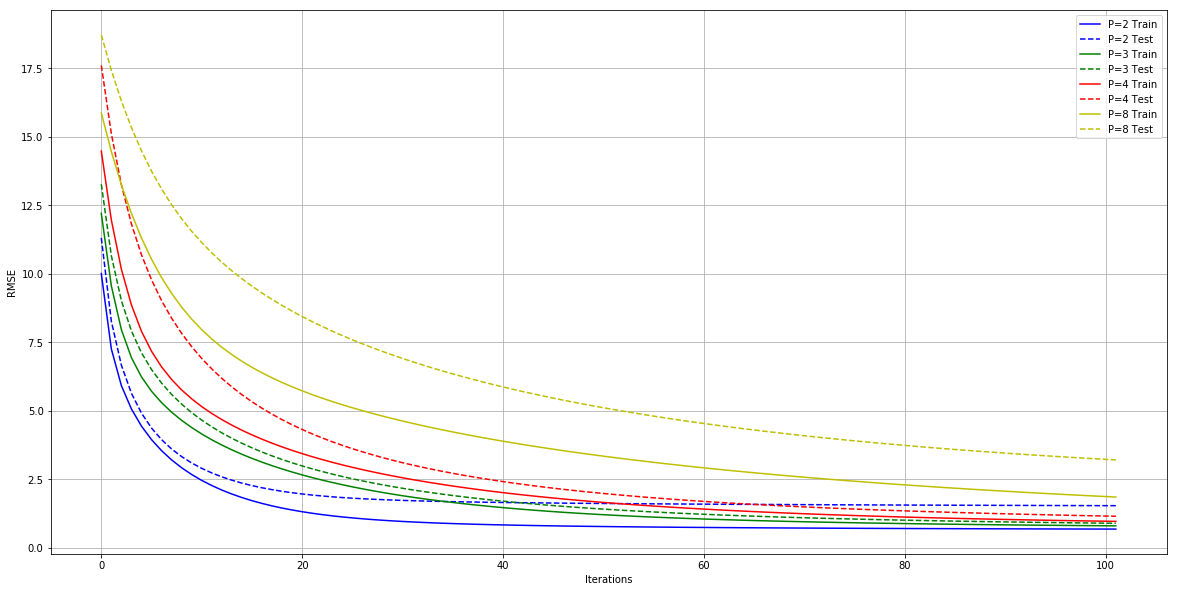

In [26]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # two axes on figure


for i in range(len(processes)):
    
    ax1.plot(RMSE_train_list1[i], col[i]+"-")
    ax1.plot(RMSE_test_list1[i], col[i]+"--")
    
ax1.grid()
ax1.set_xlabel("Iterations")
ax1.set_ylabel("RMSE")
ax1.legend(("P=2 Train","P=2 Test","P=3 Train","P=3 Test","P=4 Train","P=4 Test","P=8 Train", "P=8 Test","Sequential"))

### KDD Cup Dataset (dataset 2)

In [16]:
!python sequential_version.py K

name = "K"
RMSE_train_sequential2 = np.load(name+"_RMSE_train.npy")
RMSE_test_sequential2 = np.load(name+"_RMSE_test.npy")
time_per_epoch_sequential2 = np.load(name+"_time.npy")
acum_time_sequential2 = np.cumsum(time_per_epoch_sequential2)
total_time_sequential2 = np.sum(time_per_epoch_sequential2)
mean_time_sequential2 = np.mean(time_per_epoch_sequential2)

Loading KDD CUP dataset...


sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


Running for  2  processes
Loading KDD CUP dataset...
Reading and preprocessing time in master: 8.841421584787895
Running for  3  processes


sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


Loading KDD CUP dataset...
Reading and preprocessing time in master: 9.80353078970802
Running for  4  processes


sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


Loading KDD CUP dataset...
Reading and preprocessing time in master: 8.881461834243964
Running for  8  processes


sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


Loading KDD CUP dataset...
Reading and preprocessing time in master: 10.195448367507197


sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


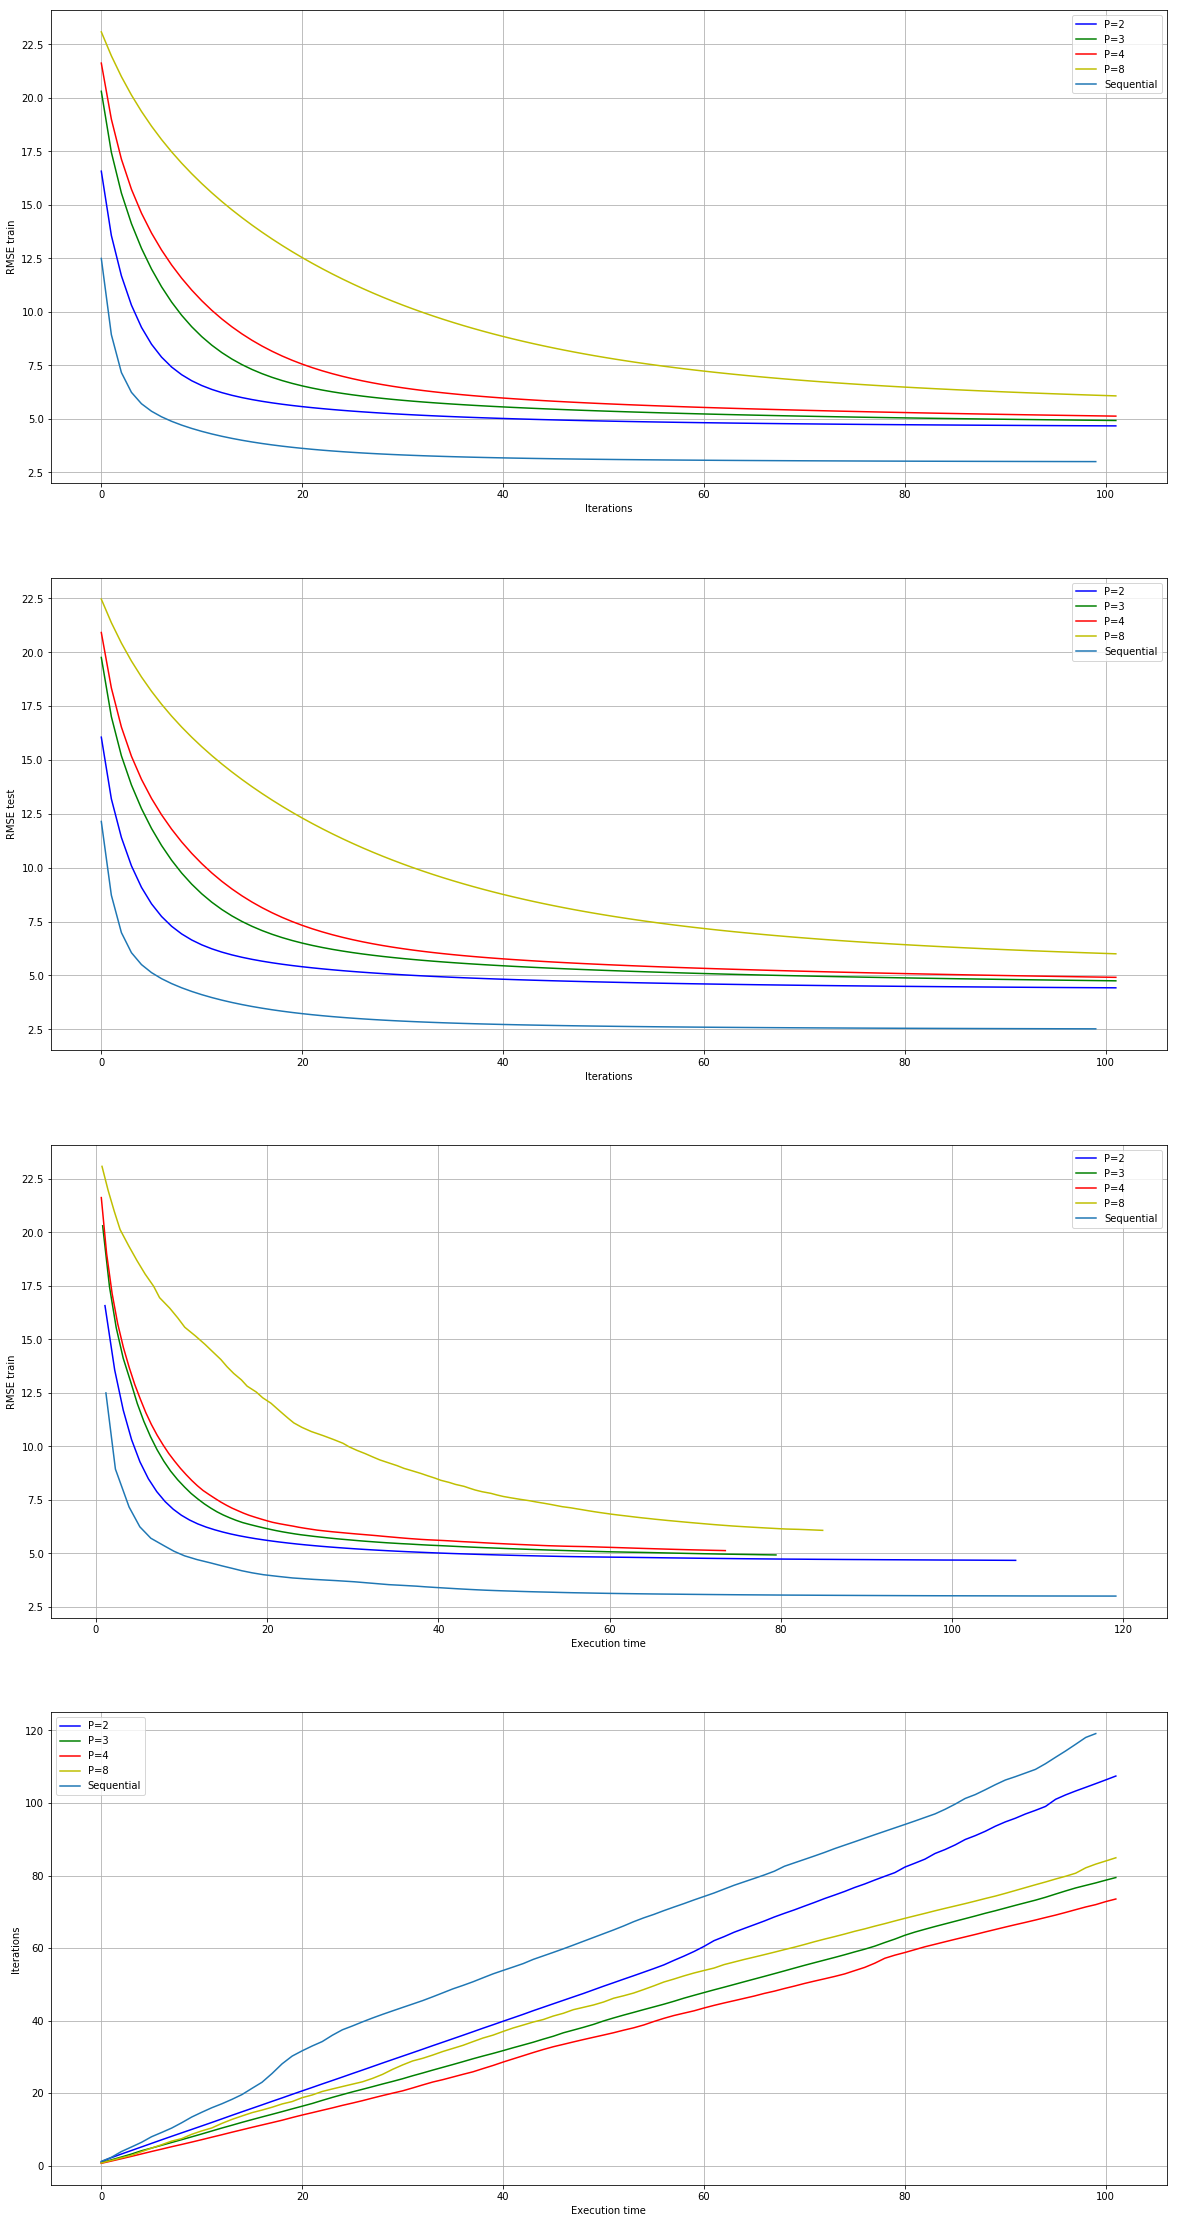

In [17]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20,40)) # two axes on figure

RMSE_train_list2 = []
RMSE_test_list2 = []
acum_time_list2 = []
total_time_list2 = []
mean_time_list2 = []


for i in range(len(processes)):
    
    p = processes[i]
    print("Running for ", p, " processes")

    name = "K"+str(p)
    !mpiexec -n $p python PSGD_MPI.py $name
    
    RMSE_train = np.load(name+"_RMSE_train.npy")
    RMSE_test = np.load(name+"_RMSE_test.npy")
    time_per_epoch = np.load(name+"_time.npy")
    acum_time = np.cumsum(time_per_epoch)
    total_time = np.sum(time_per_epoch)
    mean_time = np.mean(time_per_epoch)
    
    RMSE_train_list2.append(RMSE_train)
    RMSE_test_list2.append(RMSE_test)
    acum_time_list2.append(acum_time)
    total_time_list2.append(total_time)
    mean_time_list2.append(mean_time)
    
    ax1.plot(RMSE_train, col[i]+"-")
    ax2.plot(RMSE_test, col[i]+"-")
    ax3.plot(acum_time, RMSE_train, col[i]+"-")
    ax4.plot(acum_time, col[i]+"-")

ax1.plot(RMSE_train_sequential2)
ax2.plot(RMSE_test_sequential2)
ax3.plot(acum_time_sequential2, RMSE_train_sequential2)
ax4.plot(acum_time_sequential2)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("RMSE train")
ax1.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax1.grid()

ax2.set_xlabel("Iterations")
ax2.set_ylabel("RMSE test")
ax2.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax2.grid()

ax3.set_xlabel("Execution time")
ax3.set_ylabel("RMSE train")
ax3.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax3.grid()

ax4.set_xlabel("Execution time")
ax4.set_ylabel("Iterations")
ax4.legend(("P=2","P=3","P=4","P=8","Sequential"))
ax4.grid()

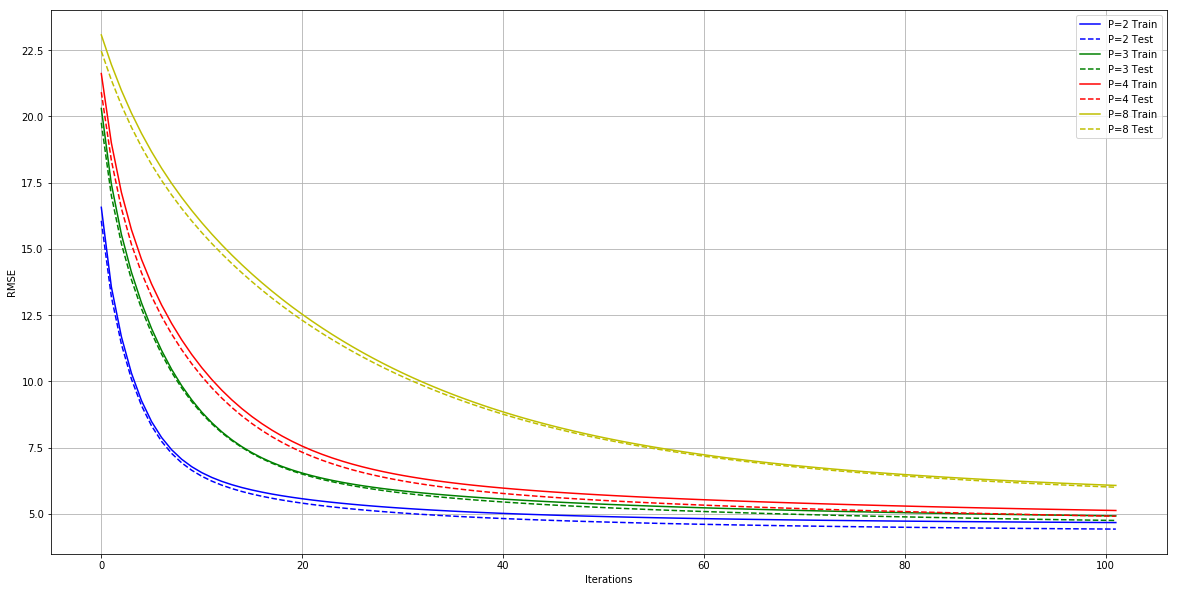

In [27]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # two axes on figure


for i in range(len(processes)):
    
    ax1.plot(RMSE_train_list2[i], col[i]+"-")
    ax1.plot(RMSE_test_list2[i], col[i]+"--")
    
ax1.grid()
ax1.set_xlabel("Iterations")
ax1.set_ylabel("RMSE")
ax1.legend(("P=2 Train","P=2 Test","P=3 Train","P=3 Test","P=4 Train","P=4 Test","P=8 Train", "P=8 Test","Sequential"))

After running the experiment on both datasets, we can conclude that the distributed gradient descent may not give exactly the same final RMSE or convergence. Moreover, the more slaves (processes), the worst is the final RMSE (both in train and test). However, according to the plots, we can clearly see that there is an speed-up on the time used per iteration as the number of processes increases. The best number of processes to gain a speed-up in my personal laoptop is around 3-4 processes. While having many of them (e.g. 8), does not represent a comparable gain. In all the experiments, the worst time was certainly achieved with the sequential algorithm. 

# References

- Dataset 1: https://archive.ics.uci.edu/ml/datasets/Dynamic+Features+of+VirusShare+Executables
- Dataset 2: https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data
- Scikit learn: https://scikit-learn.org/stable/